# Diabetes Prediction

# Problem Statement
The objective of this project is to classify whether someone has diabetes or not.
Dataset consists of several Medical Variables(Independent) and one Outcome Variable(Dependent)
The outcome variable value is either 1 or 0 indicating whether a person has diabetes(1) or not(0).

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('pima_diabetes (1).csv')

In [4]:
df.head()

Preg  Plas  Pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.shape

(768, 9)

In [7]:
df.describe().T

count        mean         std     min       25%       50%        75%  \
Preg   768.0    3.845052    3.369578   0.000   1.00000    3.0000    6.00000   
Plas   768.0  120.894531   31.972618   0.000  99.00000  117.0000  140.25000   
Pres   768.0   69.105469   19.355807   0.000  62.00000   72.0000   80.00000   
skin   768.0   20.536458   15.952218   0.000   0.00000   23.0000   32.00000   
test   768.0   79.799479  115.244002   0.000   0.00000   30.5000  127.25000   
mass   768.0   31.992578    7.884160   0.000  27.30000   32.0000   36.60000   
pedi   768.0    0.471876    0.331329   0.078   0.24375    0.3725    0.62625   
age    768.0   33.240885   11.760232  21.000  24.00000   29.0000   41.00000   
class  768.0    0.348958    0.476951   0.000   0.00000    0.0000    1.00000   

          max  
Preg    17.00  
Plas   199.00  
Pres   122.00  
skin    99.00  
test   846.00  
mass    67.10  
pedi     2.42  
age     81.00  
class    1.00

In [8]:
df.isna().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [9]:
df.isna().apply(pd.value_counts).T

False
Preg     768
Plas     768
Pres     768
skin     768
test     768
mass     768
pedi     768
age      768
class    768

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

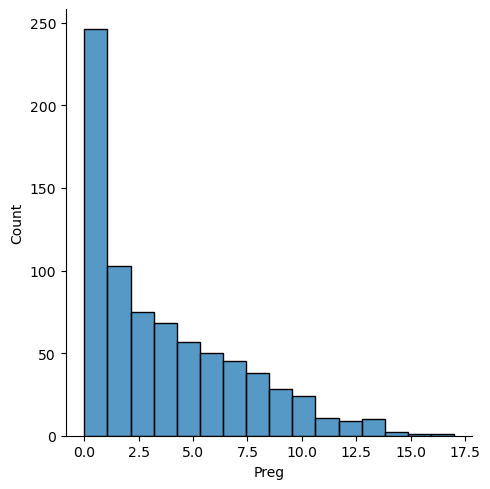

In [11]:
sns.displot(df['Preg'])

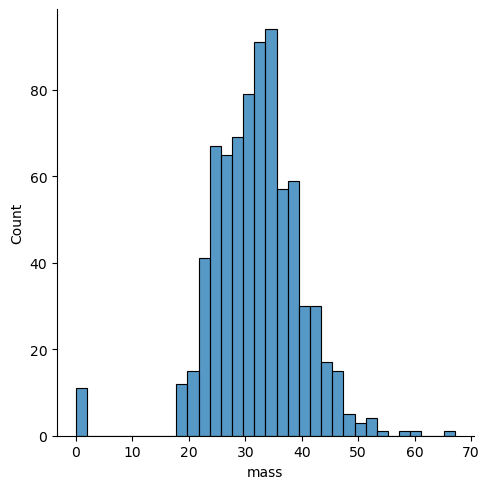

In [12]:
sns.displot(df['mass'])

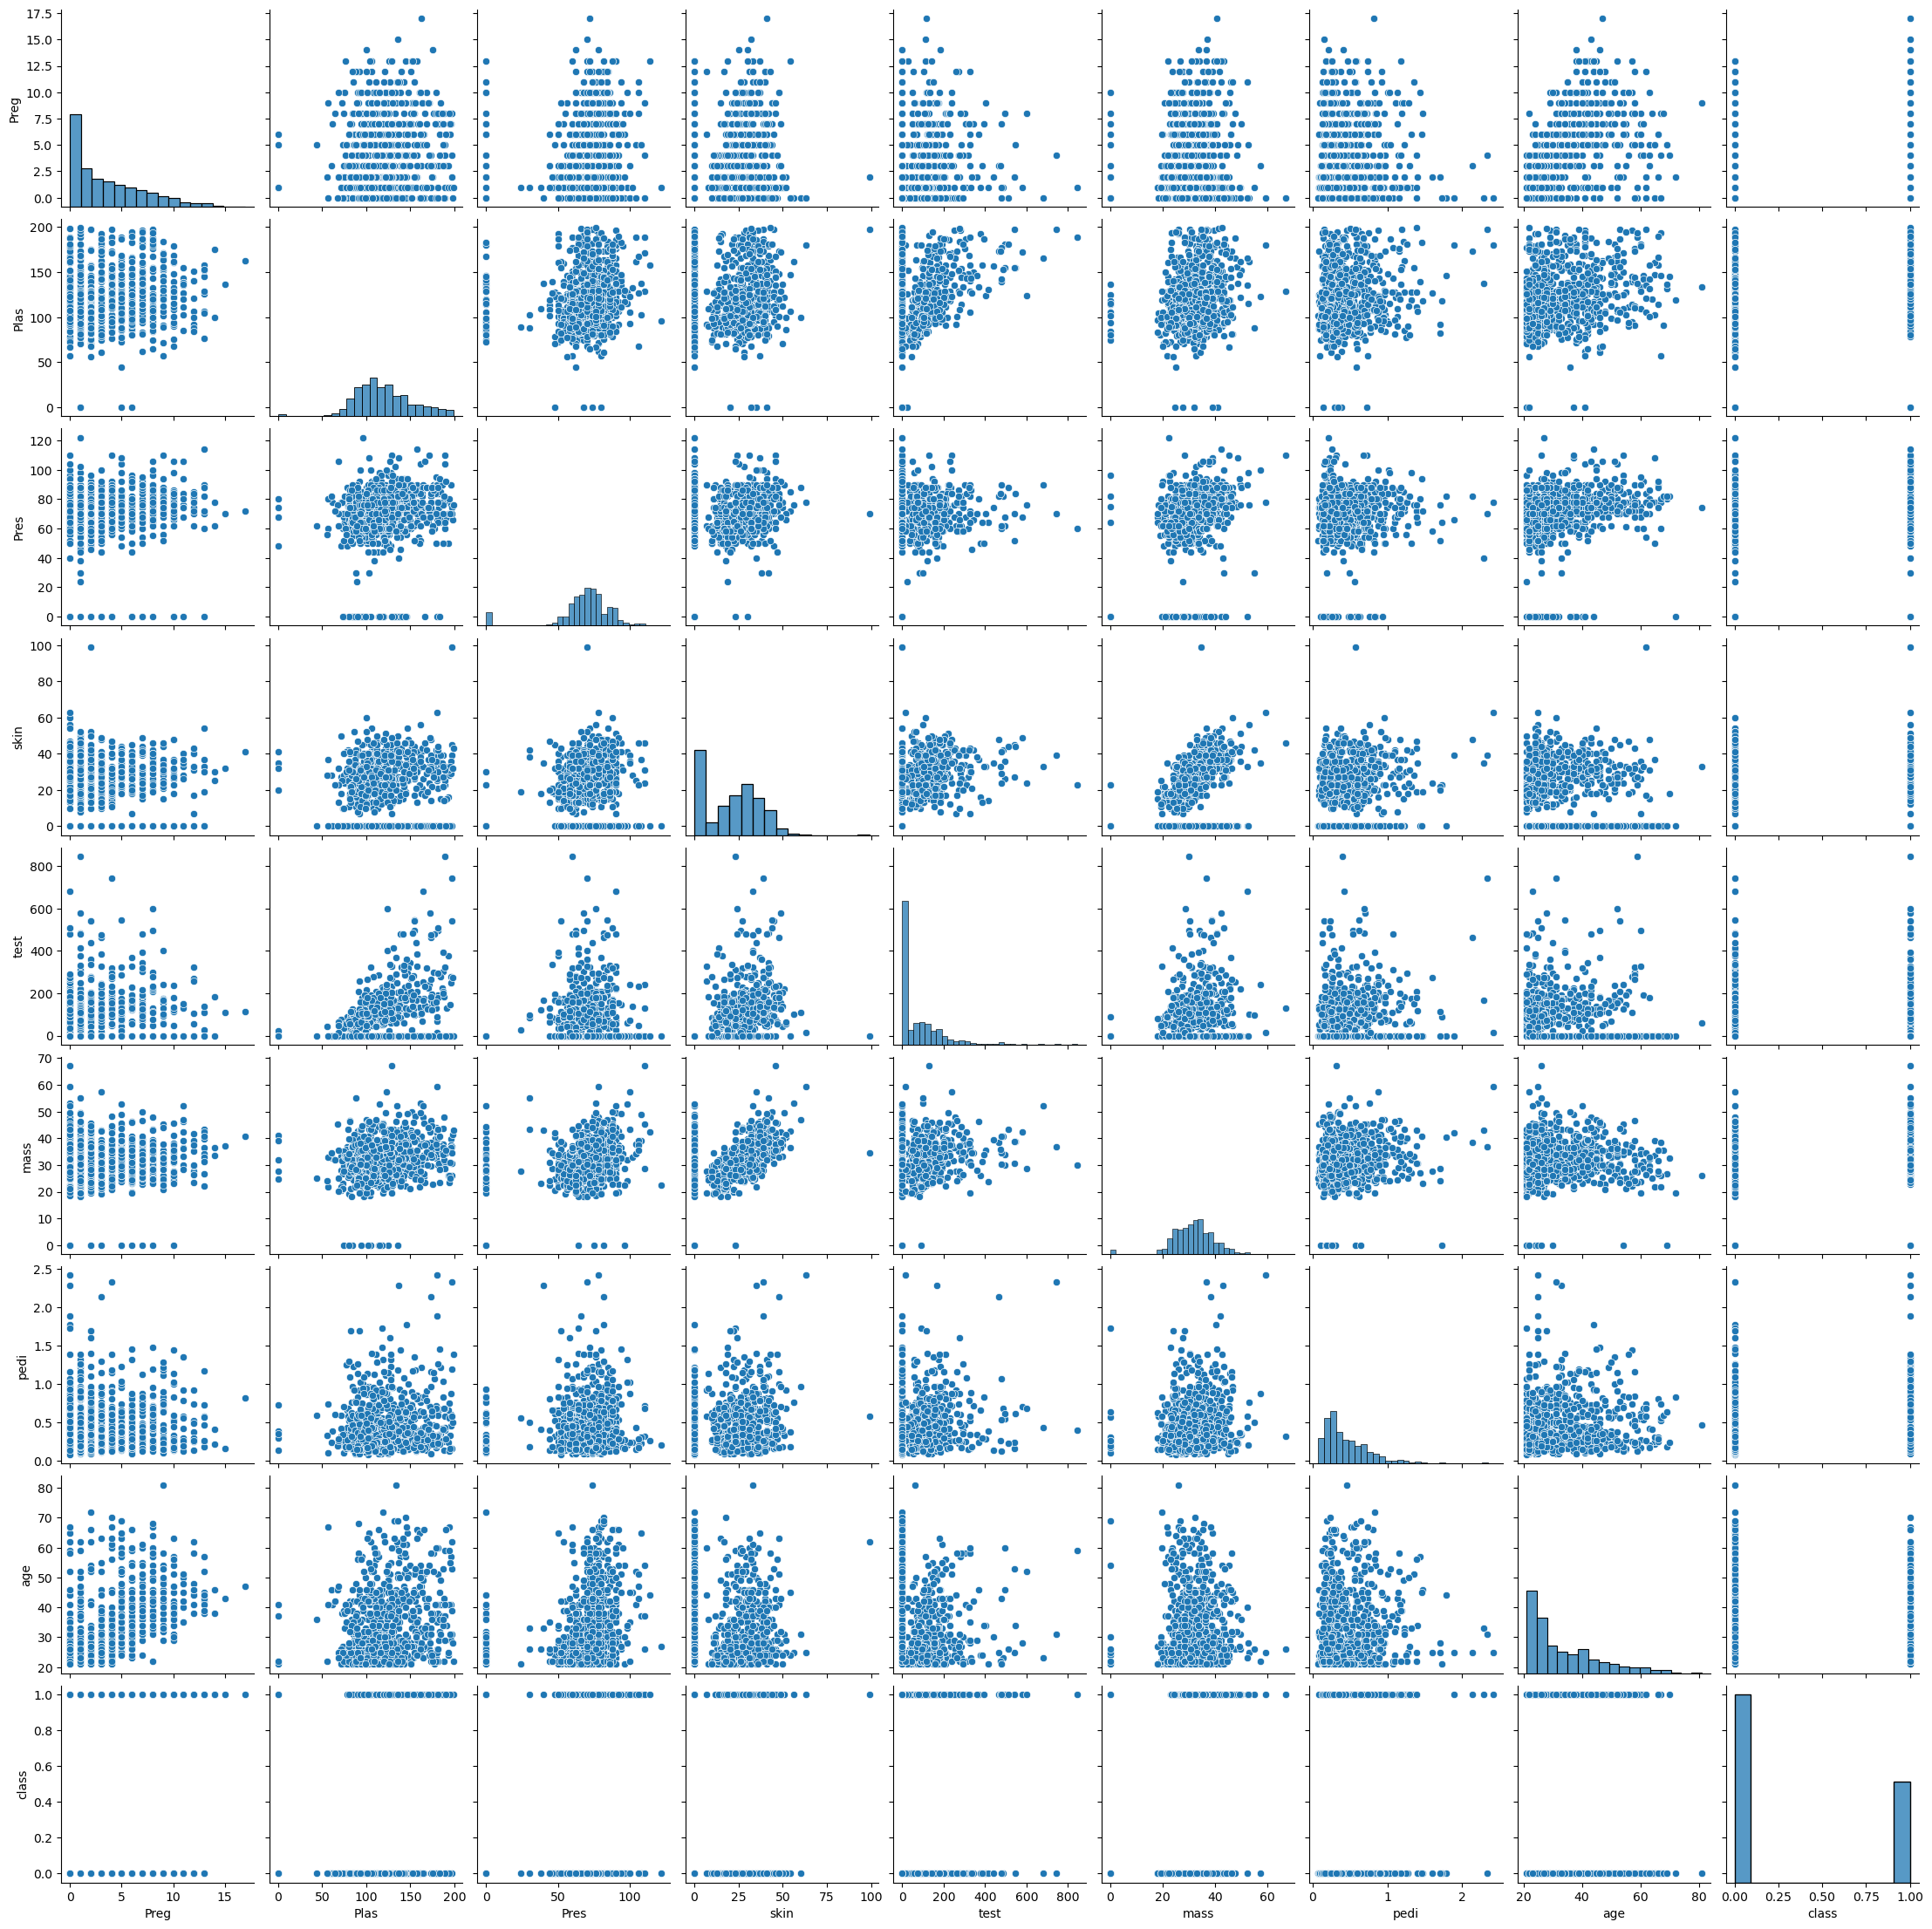

In [13]:
sns.pairplot(df)

In [14]:
corr=df.corr()
corr

Preg      Plas      Pres      skin      test      mass      pedi  \
Preg   1.000000  0.129459  0.141282 -0.081672 -0.073535  0.017683 -0.033523   
Plas   0.129459  1.000000  0.152590  0.057328  0.331357  0.221071  0.137337   
Pres   0.141282  0.152590  1.000000  0.207371  0.088933  0.281805  0.041265   
skin  -0.081672  0.057328  0.207371  1.000000  0.436783  0.392573  0.183928   
test  -0.073535  0.331357  0.088933  0.436783  1.000000  0.197859  0.185071   
mass   0.017683  0.221071  0.281805  0.392573  0.197859  1.000000  0.140647   
pedi  -0.033523  0.137337  0.041265  0.183928  0.185071  0.140647  1.000000   
age    0.544341  0.263514  0.239528 -0.113970 -0.042163  0.036242  0.033561   
class  0.221898  0.466581  0.065068  0.074752  0.130548  0.292695  0.173844   

            age     class  
Preg   0.544341  0.221898  
Plas   0.263514  0.466581  
Pres   0.239528  0.065068  
skin  -0.113970  0.074752  
test  -0.042163  0.130548  
mass   0.036242  0.292695  
pedi   0.033561  0.173844  
age    1.000000  0.238356  
class  0.238356  1.000000

In [15]:
corr['class']

Preg     0.221898
Plas     0.466581
Pres     0.065068
skin     0.074752
test     0.130548
mass     0.292695
pedi     0.173844
age      0.238356
class    1.000000
Name: class, dtype: float64

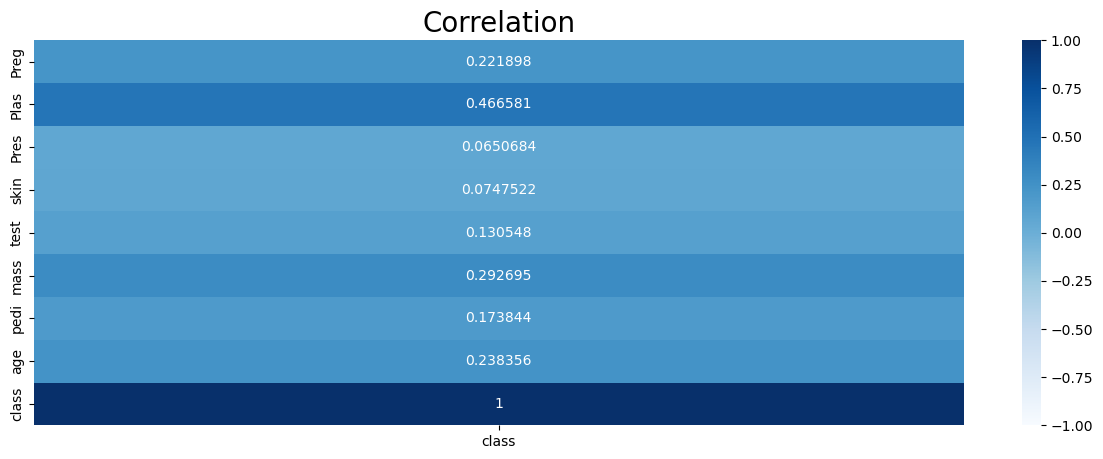

In [16]:
plt.figure(figsize=(15,5))
plt.title('Correlation',fontsize=20)
sns.heatmap(corr[['class']],cmap='Blues',vmax=1.0,vmin=-1.0,fmt='g',annot=True)
plt.show()

In [17]:
import pandas_profiling
import warnings
warnings.filterwarnings('ignore')

In [18]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
X=df.drop('class',axis=1) #independent

In [20]:
y=df[['class']]

In [21]:
X.head()

Preg  Plas  Pres  skin  test  mass   pedi  age
0     6   148    72    35     0  33.6  0.627   50
1     1    85    66    29     0  26.6  0.351   31
2     8   183    64     0     0  23.3  0.672   32
3     1    89    66    23    94  28.1  0.167   21
4     0   137    40    35   168  43.1  2.288   33

In [22]:
y.head()

class
0      1
1      0
2      1
3      0
4      1

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [25]:
X_train.shape

(614, 8)

In [26]:
X_test.shape

(154, 8)

In [27]:
y_train.shape

(614, 1)

In [28]:
y_test.shape

(154, 1)

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
nb=GaussianNB()

In [31]:
nb.fit(X_train,y_train)

GaussianNB()

In [32]:
nb.pred=nb.predict(X_test)

In [33]:
nb.pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [35]:
accuracy_score(y_test,nb.pred)*100

77.27272727272727

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr=LogisticRegression()

In [38]:
lr.fit(X_train,y_train)

LogisticRegression()

In [39]:
lr_pred=lr.predict(X_test)

In [40]:
lr_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [41]:
accuracy_score=(y_test,lr_pred)*100

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn=KNeighborsClassifier(n_neighbors=2)

In [44]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [45]:
knn_pred=knn.predict(X_test)

In [46]:
knn_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [47]:
accuracy_score=(y_test,knn_pred)*100

In [48]:
cf_nb=confusion_matrix(y_test,nb.pred)
cf_nb

array([[85, 14],
       [21, 34]], dtype=int64)

<Axes: title={'center': 'Confusion_matrix'}>

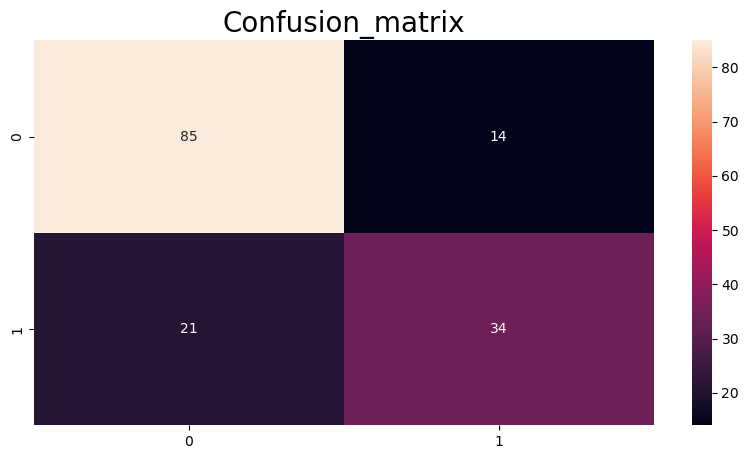

In [49]:
plt.figure(figsize=(10,5))
plt.title('Confusion_matrix',fontsize=20)
sns.heatmap(cf_nb,annot=True,fmt='g')

In [50]:
cf_lr=confusion_matrix(y_test,lr_pred)
cf_lr

array([[89, 10],
       [24, 31]], dtype=int64)

In [51]:
cf_nb

array([[85, 14],
       [21, 34]], dtype=int64)

<Axes: title={'center': 'Confusion_matrix_LR'}>

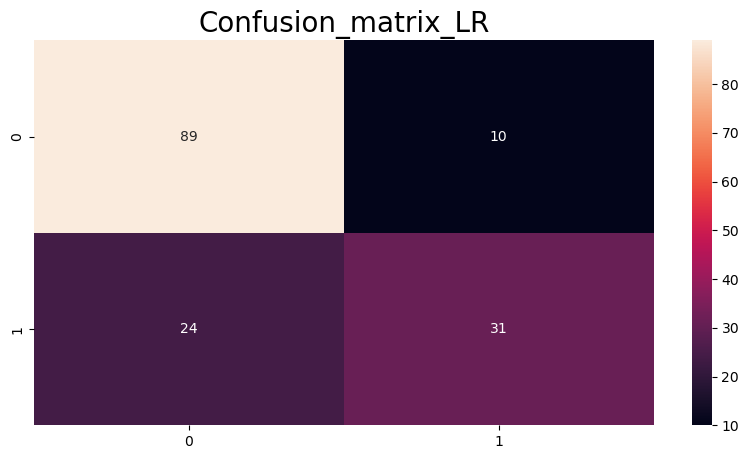

In [52]:
plt.figure(figsize=(10,5))
plt.title('Confusion_matrix_LR',fontsize=20)
sns.heatmap(cf_lr,annot=True,fmt='g')

In [53]:
df['class'].value_counts()

0    500
1    268
Name: class, dtype: int64